<a href="https://colab.research.google.com/github/martasaparicio/lematecX/blob/main/01-Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solved Exercise

## Introduction

In this exercise, we aim to predict whether or not a given Titanic passenger survived. To do this, we will examine various characteristics of these passengers, such as the class they were traveling in, their age and their sex. 

## Data

*   Number of observations = 756
*   Number of independent variables = 4
  1.  Name = passenger name
  2.  PClass = class in which the passenger was traveling
  3.  Age = age of passenger (years)
  4.  Sex = passenger sex (1 if female, 0 if male)
*   Number of dependent variables = 1
  1.  Survived = tells us whether a passenger survived (1) or not (0)

Data avaliable at: https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic-00.csv 

**Note**: The dependent and independent variables are defined specifically using the information in the exercise's introduction. If in the introduction we were asked, for example, to predict a passenger's age based on the remaining variables, the dependent variable would be 'Age' and not 'Survived'. 

## Example

The first observation in the dataset that we will see in the Solution - the first row in the table that appears after doing `df` - refers to a passenger who:

*   Was called 'Allen, Miss Elisabeth Walton'
*   Was traveling in first class
*   Was 29 years old
*   Was female
*   Survived the accident

In [ ]:
# Import libraries
import pandas as pd  
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Note**: If `FutureWarning` appears while you are importing the libraries, do not worry. This message appears associated with a library and serves only to inform you that some changes are ocurring in that library.

# Solution

1.   Prepare data
1.   Explore data
1.   Train the model
2.   Evaluate the model

## 1. Prepare data

1. Import data

In [ ]:
# Import data
url = "https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic-00.csv"
df = pd.read_csv(url)
df

Name  PClass  ...  Sex  Survived
0                     Allen, Miss Elisabeth Walton       1  ...    1         1
1                      Allison, Miss Helen Loraine       1  ...    1         0
2              Allison, Mr Hudson Joshua Creighton       1  ...    0         0
3    Allison, Mrs Hudson JC (Bessie Waldo Daniels)       1  ...    1         0
4                    Allison, Master Hudson Trevor       1  ...    0         1
..                                             ...     ...  ...  ...       ...
751                             Zakarian, Mr Artun       3  ...    0         0
752                         Zakarian, Mr Maprieder       3  ...    0         0
753                               Zenni, Mr Philip       3  ...    0         0
754                               Lievens, Mr Rene       3  ...    0         0
755                                 Zimmerman, Leo       3  ...    0         0

[756 rows x 5 columns]

*   The import was successful

## 2. Explore data

1. View the relationship between the class in which passengers were traveling and their age

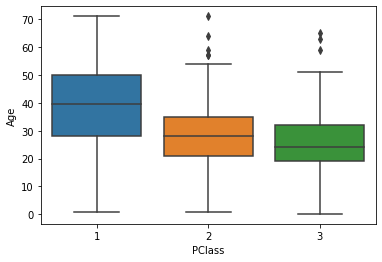

In [ ]:
# View the relationship between the class in which passengers were traveling and their age
sns.boxplot(x='PClass', y='Age', data=df)

*   The analysis of the graph suggests that first class passengers are older than second and third class passengers 
*   This most likely happens because people in their 40s have a greater purchasing power than people in their 20s/30s
*   This information is important because it gives us an idea about the relationships between variables, which helps us to understand the data

## 3. Train the model

1.   Prepare the data in order to apply the algorithm
  *   Define the independent and dependent variables
  *   Split the data into training and testing datasets 
2.   Define the algorithm to be used to train the model 
2.   Train the model with the defined algorithm


In [ ]:
# Define the independent and dependent variables
X = df[['PClass', 'Age', 'Sex']]
y = df['Survived']

*   In this case, we used the class in which passengers were traveling, their age and  their sex to predict whether or not the passenger survived the accident
*   Independent variables used (X): 'PClass', 'Age', 'Sex' 
*   Dependent variable (y): 'Survived'

In [ ]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Define the algorithm of the model
model = RandomForestClassifier(random_state=9)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

## 4. Evaluate the model

1.   Make predictions
2.   Evaluate the model based on the predictions made


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using success rate 
accuracy_score(y_test, y_pred)

0.7883597883597884

*   Our model has a success rate (`accuracy_score`) of approximately 80% 